### import libraries

In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataframe

In [2]:
df = pd.read_csv('slam_articles_with_country.csv')

## plot the number of publications by year

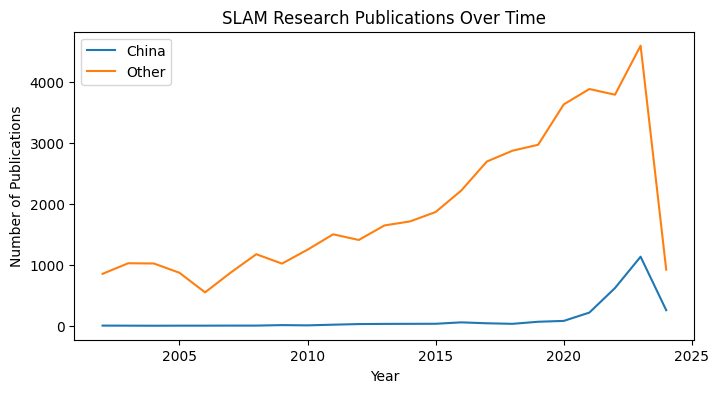

In [3]:
china_df = df[df['country'] == 'China']
other_df = df[df['country'] != 'China']

# Count publications per year
china_yearly = china_df.groupby('year').size()
other_yearly = other_df.groupby('year').size()

plt.figure(figsize=(8, 4))
plt.plot(china_yearly.index, china_yearly.values, label='China')
plt.plot(other_yearly.index, other_yearly.values, label='Other')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('SLAM Research Publications Over Time')
plt.legend()
plt.show()

## plot the number of publications by year for all countries

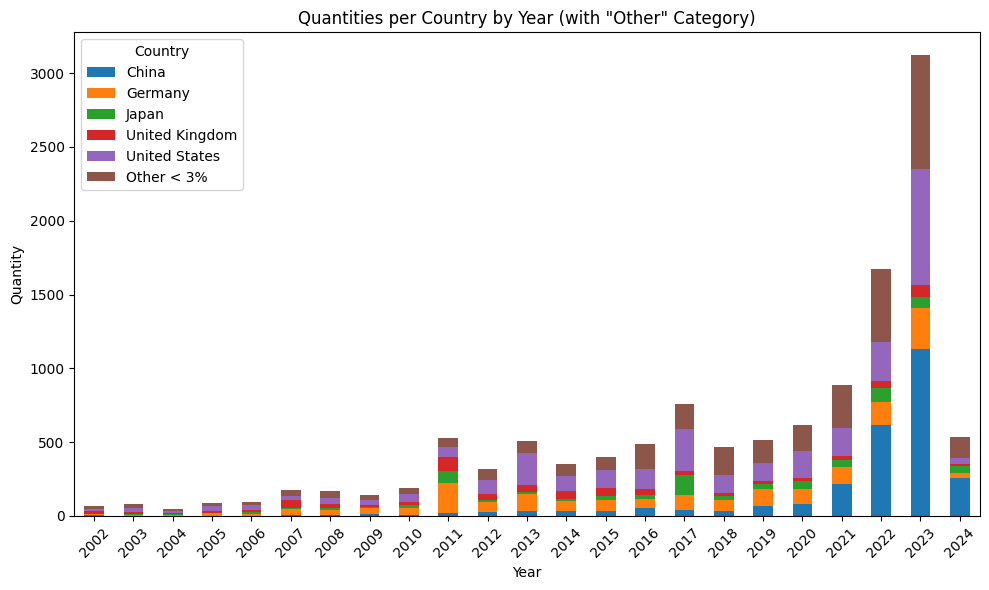

In [4]:
trh_percent = 3

copy_df = df.copy()

# Calculate the percentage of entries for each country
country_counts = copy_df['country'].value_counts(normalize=True) * 100

# Identify countries with less than THR of entries
small_countries = country_counts[country_counts < trh_percent].index

# Replace these countries with 'Other' in the dataframe
copy_df['country_adjusted'] = copy_df['country'].apply(lambda x: f'Other < {trh_percent}%' if x in small_countries else x)

# Aggregate the data again with the adjusted country column
agg_data_adjusted = copy_df.groupby(['year', 'country_adjusted']).size().unstack(fill_value=0)

# If 'Other' exists, move it to the end of the DataFrame for better visualization
if f'Other < {trh_percent}%' in agg_data_adjusted.columns:
    cols = [col for col in agg_data_adjusted if col != f'Other < {trh_percent}%'] + [f'Other < {trh_percent}%']
    agg_data_adjusted = agg_data_adjusted[cols]

agg_data_adjusted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quantities per Country by Year (with "Other" Category)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## Percentage of publications by countries over the last 10 years

In [90]:
last_years_data = df[(df['year'] >= 2014)]
country_counts = last_years_data['country'].value_counts(normalize=True) * 100

print("Percentage of Publications by Country Over the Last 10 Years:")
sh =20
sum = 0
for i, (country, val) in enumerate(country_counts.items()):
    sum += val
    print(f"{i}) {country}:{" "*(sh -len(country))}{val:.1f}%")
    if i == 5:
        print('-'*(sh//2))
        print("Other:"," "*(sh-2), f"{(100-sum):.1f}%", sep='')
        break

Percentage of Publications by Country Over the Last 10 Years:
0) China:               26.1%
1) United States:       23.9%
2) Germany:             12.1%
3) Japan:               5.9%
4) United Kingdom:      4.1%
5) Singapore:           3.4%
----------
Other:                  24.6%


## Percentage of publications by countries over the 2023 year

In [94]:
year = 2023
last_years_data = df[(df['year'] == year)]
country_counts = last_years_data['country'].value_counts(normalize=True) * 100

print(f"Percentage of Publications by Country Over the {year} Year:")
sh =20
sum = 0
for i, (country, val) in enumerate(country_counts.items()):
    sum += val
    print(f"{i}) {country}:{" "*(sh -len(country))}{val:.1f}%")
    if i == 5:
        print('-'*(sh//2))
        print("Other:"," "*(sh-2), f"{(100-sum):.1f}%", sep='')
        break

Percentage of Publications by Country Over the 2023 Year:
0) China:               36.2%
1) United States:       25.2%
2) Germany:             8.9%
3) Singapore:           3.2%
4) United Kingdom:      2.7%
5) South Korea:         2.6%
----------
Other:                  21.3%


## plot h-index for countries by year
The h-index is defined as the maximum value of h such that the given author/journal has published at least h papers that have each been cited at least h times.

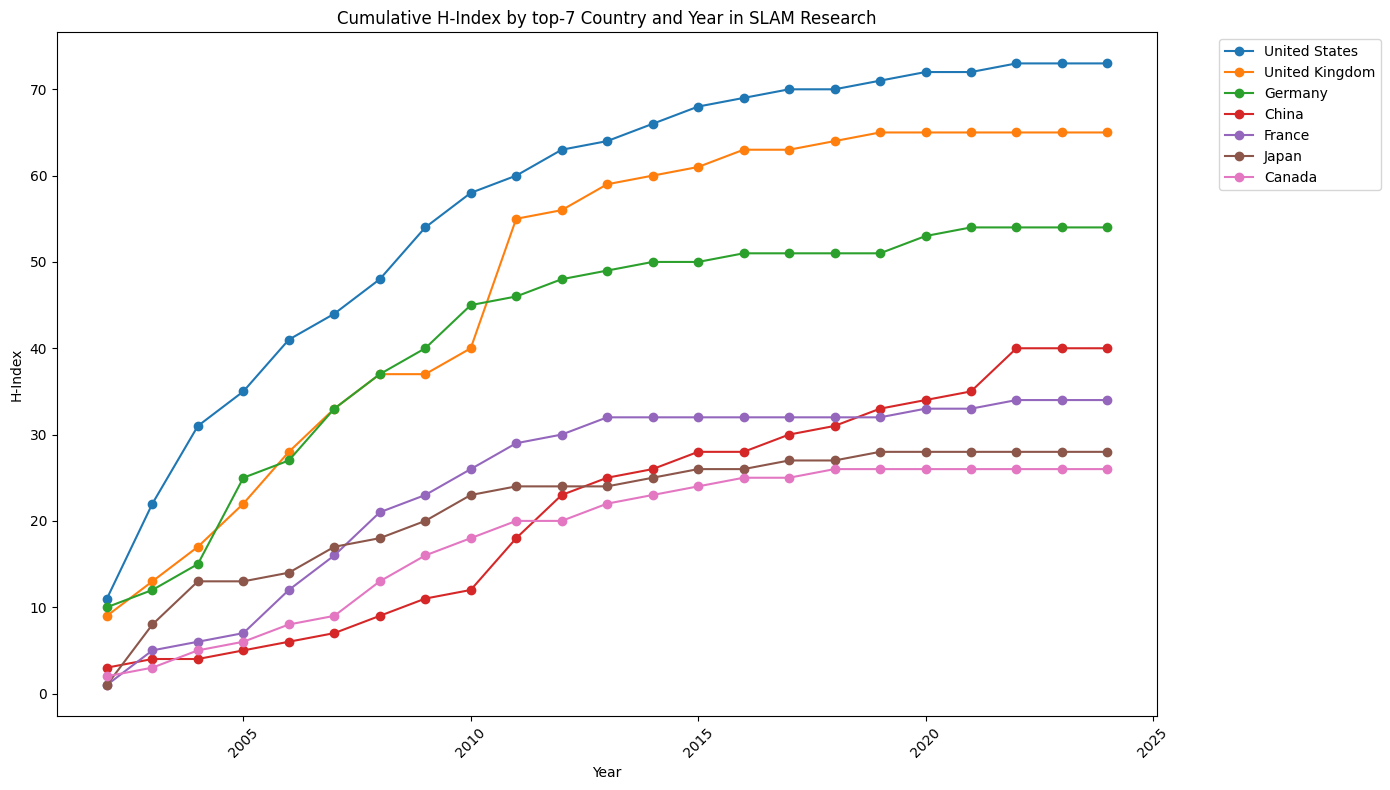

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

top_N = 7

def calculate_h_index(citations):
    return sum(x >= i + 1 for i, x in enumerate(sorted(  list(citations), reverse=True)))

copy_df = df.dropna(subset=['country','is-referenced-by-count'])

# Prepare the data: for each country, for each year, include all articles up to that year
country_list = copy_df['country'].unique()
year_list = sorted(copy_df['year'].unique())
h_indices = {c:{} for c in country_list}

for country in copy_df['country'].unique():
    country_data = copy_df[copy_df['country'] == country]
    for year in year_list:
        citations = country_data[country_data['year'] <= year]['is-referenced-by-count'].tolist()
        h_indices[country][year] = calculate_h_index(citations)

latest_h_indices = {country: h_indices[country][year_list[-1]] for country in h_indices}
top_N_countries = sorted(latest_h_indices, key=latest_h_indices.get, reverse=True)[:top_N]

# Plotting
plt.figure(figsize=(14, 8))

for country in top_N_countries:
    idx = [h_indices[country][year] for year in year_list]
    plt.plot(year_list, idx, label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('H-Index')
plt.title(f'Cumulative H-Index by top-{top_N} Country and Year in SLAM Research')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## plot i10-index for countries by year
The i-10 index indicates the number of academic publications an author has written that have been cited by at least 10 sources.

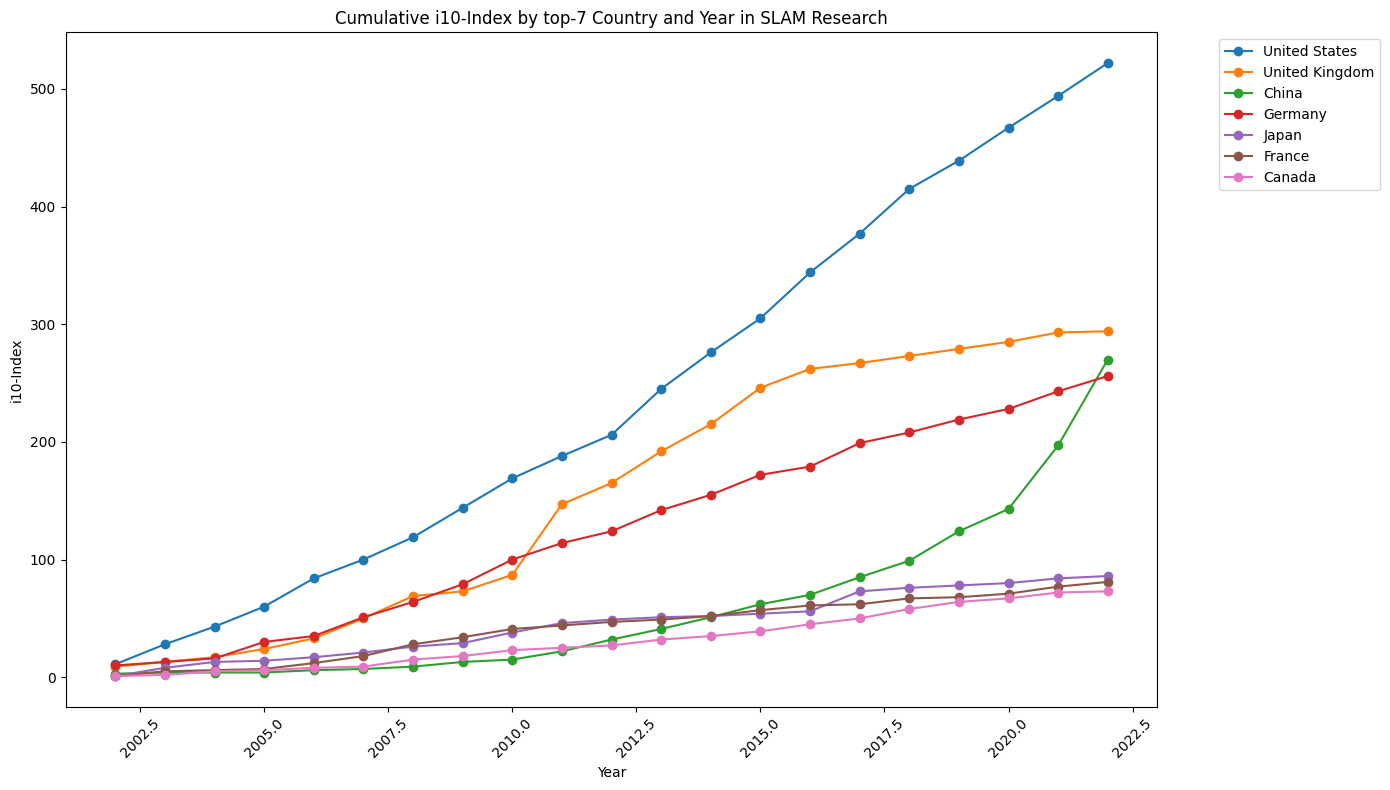

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

top_N = 7

copy_df = df.dropna(subset=['country','is-referenced-by-count'])
copy_df = copy_df[copy_df['is-referenced-by-count'] >= 10]

# Prepare the data: for each country, for each year, include all articles up to that year
country_list = copy_df['country'].unique()
year_list = sorted(copy_df['year'].unique())
year_list = year_list[:-1] # skip last year
i10_indices = {}

for country in copy_df['country'].unique():
    country_data = copy_df[copy_df['country'] == country]
    i10_indices[country] = {year:len(country_data[country_data['year'] <= year]) for year in year_list}

latest_i10_indices = {country: i10_indices[country][year_list[-1]] for country in i10_indices}
top_N_countries = sorted(latest_i10_indices, key=latest_i10_indices.get, reverse=True)[:top_N]

# Plotting
plt.figure(figsize=(14, 8))

for country in top_N_countries:
    idx = [i10_indices[country][year] for year in year_list]
    plt.plot(year_list, idx, label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('i10-Index')
plt.title(f'Cumulative i10-Index by top-{top_N} Country and Year in SLAM Research')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
